# Dynamic Programming (DP) Matrix Distribution
We collect here some preliminary analysis on the distribution on the values on the entries of the dynamic programming matrix used to compute the edit distance

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
def ed(x, y):
    n = len(x)
    m = len(y)
    M = np.zeros([n+1,m+1])
    M[0,:] = np.arange(0,m+1)
    M[:,0] = np.arange(0,n+1)
    for i in range(n):
        for j in range(m):
            delta = int(x[i]!=y[j])
            M[i+1,j+1] = min(M[i,j] + delta, min(M[i,j+1]+1,M[i+1,j]+1))
    return M

The following code runs many times the dynamic programming algorithm and accumulates on a single matrix all the outcome matrixes for further analysis

In [73]:
Sigma = ["A","C","G","T"]
n = 256
n_pairs = 1000
M = np.zeros([n+1,n+1])
for k in range(n_pairs):
    x = np.random.choice(Sigma,n)
    y = np.random.choice(Sigma,n)
    M += ed(x,y)

It appears interesting the relation between diagonal elements. The element $M_{i,i}$ of the computed matrix contains an estimated of $e(i)$, therefore the difference between elements $(i,i)$ and $(i-1,i-1)$ of this matrix represent an estimate of the difference between $e(i)$ and $e(i-1)$.


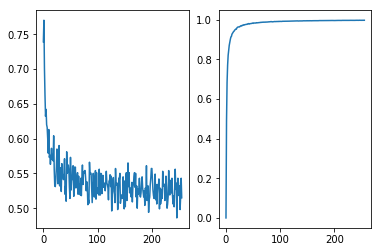

In [108]:
De = (M.diagonal()[1:]-M.diagonal()[:-1])/n_pairs
Pe = M.diagonal()[0:-1]/M.diagonal()[1:]
fig, ax = plt.subplots(1,2)
ax[0].plot(De)
ax[1].plot(Pe)


It appears the $e(n)-e(n-1)$ converges to $\alpha$ and in fact one can theoretically prove that this is the case. Moreover it is easy to show that $e(n)-e(n-1)\leq n\alpha_n$, thus such difference represents a lower bound to $\alpha_n$. However the most interesting question is whether this difference can be used as an upper bound to $\alpha$. If this were the case, then the same exhaustive values calculated up to $n=15$, would give a better upper bound than the trivial one $\alpha \leq \alpha_n$.